**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from transformers import AutoTokenizer, AutoModel
import torch

***PREPROCESSING***

In [ ]:
def preprocess_code(code):
    """
    Preprocess the code by removing comments, extra whitespaces, and normalizing it.
    """
    # Remove single-line comments
    code = re.sub(r"//.*", "", code)
    # Remove multi-line comments
    code = re.sub(r"/\*[\s\S]*?\*/", "", code)
    # Remove extra spaces and newlines
    code = re.sub(r"\s+", " ", code).strip()
    return code

# Example usage
code1 = """
// This is a single-line comment
int main() {
    /* Multi-line comment
       example */
    int a = 5; // Variable assignment
    return a;
}
"""
preprocessed_code1 = preprocess_code(code1)
print(preprocessed_code1)


int main() { int a = 5; return a; }


TOKENISATION AND EMBEDDING

In [ ]:
def tokenize_and_embed(code_snippets, model_name="microsoft/codebert-base"):
    """
    Tokenize and embed source code snippets using a pretrained model.
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    embeddings = []
    for code in code_snippets:
        inputs = tokenizer(code, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Use the CLS token embedding as the sentence representation
        embeddings.append(outputs.last_hidden_state[:, 0, :].squeeze().numpy())
    return normalize(np.array(embeddings))  # Normalize embeddings for cosine similarity

# Example usage
code_snippets = [
    "int add(int a, int b) { return a + b; }",
    "int sum(int x, int y) { return x + y; }"
]
embedded_codes = tokenize_and_embed(code_snippets)
print(embedded_codes)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

[[-0.0046362   0.02060813 -0.00162664 ... -0.02278912 -0.01240433
   0.01885059]
 [-0.00504782  0.01978063 -0.0019137  ... -0.01810592 -0.01148306
   0.02049402]]


COSINE SIMILARITY

In [ ]:
def calculate_similarity(embeddings):
    """
    Calculate cosine similarity between all pairs of code embeddings.
    """
    similarity_matrix = cosine_similarity(embeddings)
    return similarity_matrix

# Example usage
similarity_matrix = calculate_similarity(embedded_codes)
print("Cosine Similarity Matrix:\n", similarity_matrix)


Cosine Similarity Matrix:
 [[1.0000002  0.99878645]
 [0.99878645 1.0000001 ]]


DATASET

In [ ]:
# Example dataset
data = {
    "code1": ["int add(int a, int b) { return a + b; }", "int sum(int x, int y) { return x + y; }"],
    "code2": ["int sum(int x, int y) { return x + y; }", "int multiply(int a, int b) { return a * b; }"],
    "similarity": [1, 0]
}
df = pd.DataFrame(data)


VISUALIZATION

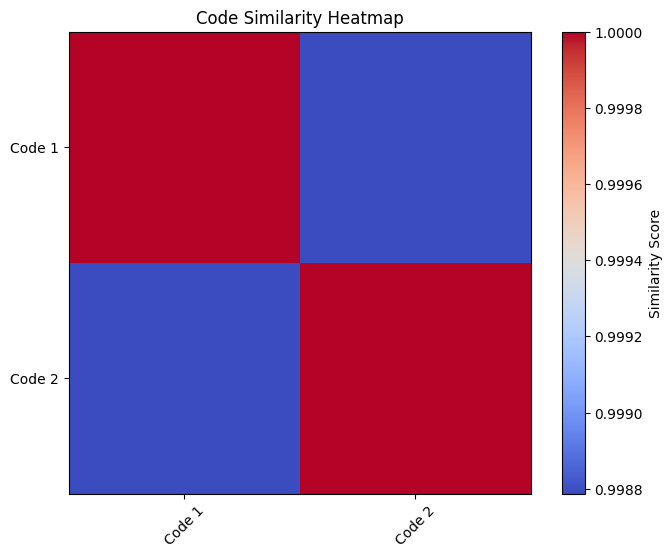

In [ ]:
def plot_similarity(similarity_matrix, code_snippets):
    """
    Plot a heatmap of the similarity matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label="Similarity Score")
    plt.xticks(range(len(code_snippets)), [f"Code {i+1}" for i in range(len(code_snippets))], rotation=45)
    plt.yticks(range(len(code_snippets)), [f"Code {i+1}" for i in range(len(code_snippets))])
    plt.title("Code Similarity Heatmap")
    plt.show()

# Example usage
plot_similarity(similarity_matrix, code_snippets)


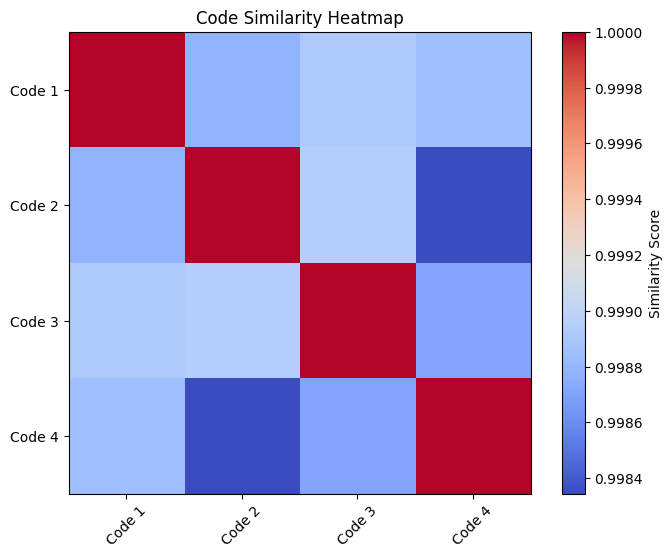

In [ ]:
code_snippets = [
    "int add(int a, int b) { return a + b; }",
    "int sum(int x, int y) { return x + y; }",
    "int multiply(int a, int b) { return a * b; }",
    "int subtract(int a, int b) { return a - b; }"
]

# Preprocess, tokenize, and embed
preprocessed_codes = [preprocess_code(code) for code in code_snippets]
embeddings = tokenize_and_embed(preprocessed_codes)

# Calculate cosine similarity
similarity_matrix = calculate_similarity(embeddings)

# Plot similarity matrix
plot_similarity(similarity_matrix, code_snippets)
